<a href="https://colab.research.google.com/github/azheng456/2019-2020-NBA-Data/blob/master/XternDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
#import pandas, matplotlib, and numpy for csv reading, data analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [246]:
#use pandas read csv function to read in the provided data
data = pd.read_csv('2020-XTern-DS.csv')

#clean up data for readability in Python
#Empty values in Reviews and Votes column are set to 0
#However, this can't be applied to rating as a rating of 0 means something (bad)
#Reviews and Votes are also changed to an integer format 
data['Reviews'].replace({'-':0},inplace=True)
data['Reviews'] = data['Reviews'].astype(int)
data['Votes'].replace({'-':0},inplace=True)
data['Votes'] = data['Votes'].astype(int)
#removed the $ sign, changed values such as x,yz to x.yz
#and changed type to float
data['Average_Cost'] = data['Average_Cost'].str.replace('$','')
data['Average_Cost'] = data['Average_Cost'].str.replace(',','.')
data['Average_Cost'] = data['Average_Cost'].astype(float)
#do the same with minimum order
data['Minimum_Order'] = data['Minimum_Order'].str.replace('$','')
data['Minimum_Order'] = data['Minimum_Order'].astype(float)
#for cook time, all values are in units of minutes so we can remove that
#and change format to int
data['Cook_Time'] = data['Cook_Time'].str.replace('minutes','')
data['Cook_Time'] = data['Cook_Time'].astype(int)

In [247]:
#let's also make a dataset for only restaurants with ratings so we can analyze later
#look at unique values of rating column, want to get rid of all
#non number values
data['Rating'].unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon'], dtype=object)

In [248]:
#-, NEW, Opening Soon are the values we need to exclude
ratings = data.loc[(data['Rating']!='-')&(data['Rating']!='NEW')&(data['Rating']!='Opening Soon')]
#change format to float
ratings['Rating'] = ratings['Rating'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


**Finding #1**

In [262]:
#slice the dataset to only include controversial restaurants where there
#are over 500 reviews in a new dataset called 'controv'
controv = data.loc[data['Reviews']>500]

#We take a look at the ratio of wait times that are over 45 mins in both
#regular restaurants and our version of 'controversial' restaurants
a=b=c=d=0
for x in data['Cook_Time']:
  if x>=45:
    a+=1
  b+=1
for x in controv['Cook_Time']:
  if x>=45:
    c+=1
  d+=1

print("The percentage that restaurants have a cook time that takes at least 45 minutes in...")
#output as a percentage as that is easiest for us to understand the value
#and process what it means
print("All Restaurants: " + str(round(a/b*100,2)) + "%")
print("Controversial Restaurants: " + str(round(c/d*100,2)) + "%")

The percentage that restaurants have a cook time that takes at least 45 minutes in...
All Restaurants: 33.09%
Controversial Restaurants: 76.19%


This finding shows that controversial restaurants (not necessarily bad, but have a high number of reviews) have a significantly higher average wait time. This could also be good or bad, but it shows the popularity of these restaurants. Customers who want to try popular restaurants with a lot of reviews may have to wait much longer than other restaurants. Let's also make a pie chart to see a larger breakdown of cook times.


In [269]:
def dashboard(y):
  a=b=c=d=e=f=0
  for x in data['Cook_Time']:
    if x<=30:
      a+=1
    elif x<=45:
      b+=1
    else:
      c+=1
  for x in controv['Cook_Time']:
    if x<=30:
      d+=1
    elif x<=45:
      e+=1
    else:
      f+=1
  labels = 'Short', 'Medium', 'Long'

  if (y=="All"):
    sizes = [a,b,c]
  else:
    sizes = [d,e,f]

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  plt.title("Gender Distribution in " + y + " Restaurants")
  plt.show()

In [272]:
interact(dashboard, y=['All', 'Controversial']); 

interactive(children=(Dropdown(description='y', options=('All', 'Controversial'), value='All'), Output()), _do…

**Finding #2**

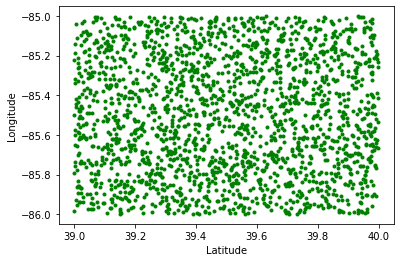

In [ ]:
#Let's take a look at how the restaurants are spread out
#based on latitude and longitude
plt.plot(data['Latitude'], data['Longitude'], 'go',markersize=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Well, it's hard to tell anything with this many datapoints. Let's break the restaurants up into 4 regions and look at the averages of restaurants in each region. We'll look at an objective measure, Rating, so we will use the ratings dataframe we made earlier with only restaurants that have a numeric rating.


In [ ]:
#get the 50% value of latitude and longitude
ratings['Latitude'].describe()

count    1666.000000
mean       39.503615
std         0.287469
min        39.000105
25%        39.260630
50%        39.506984
75%        39.753907
max        39.999523
Name: Latitude, dtype: float64

In [ ]:
ratings['Longitude'].describe()

count    1666.000000
mean      -85.503619
std         0.290402
min       -85.998844
25%       -85.746871
50%       -85.507890
75%       -85.249105
max       -85.001541
Name: Longitude, dtype: float64

In [ ]:
#divide up the 4 regions based off the middle (50%)
#of the latitude and longitude values
northeast = ratings.loc[(ratings['Latitude']>=39.506984) & (ratings['Longitude']>=-85.507890)]
northwest = ratings.loc[(ratings['Latitude']<39.506984) & (ratings['Longitude']>=-85.507890)]
southeast = ratings.loc[(ratings['Latitude']>=39.506984) & (ratings['Longitude']<-85.507890)]
southwest = ratings.loc[(ratings['Latitude']<39.506984) & (ratings['Longitude']<-85.507890)]
#perfect, all of them have a very similar amount of restaurants

In [ ]:
print("Northeast restaurants have a mean rating of "+str(round(northeast['Rating'].mean(),3))+
      " and standard deviation of " + str(round(northeast['Rating'].std(),4)))
print("Northwest restaurants have a mean rating of "+str(round(northwest['Rating'].mean(),3))+
      " and standard deviation of " + str(round(northwest['Rating'].std(),4)))
print("Southeast restaurants have a mean rating of "+str(round(southeast['Rating'].mean(),3))+
      " and standard deviation of " + str(round(southeast['Rating'].std(),4)))
print("Southwest restaurants have a mean rating of "+str(round(southwest['Rating'].mean(),3))+
      " and standard deviation of " + str(round(southwest['Rating'].std(),4)))

Northeast restaurants have a mean rating of 3.593 and standard deviation of 0.4233
Northwest restaurants have a mean rating of 3.632 and standard deviation of 0.418
Southeast restaurants have a mean rating of 3.581 and standard deviation of 0.4222
Southwest restaurants have a mean rating of 3.631 and standard deviation of 0.4252


Let's graph our results out to visualize it better. A boxplot chart is best suited to look at median and standard deviations.


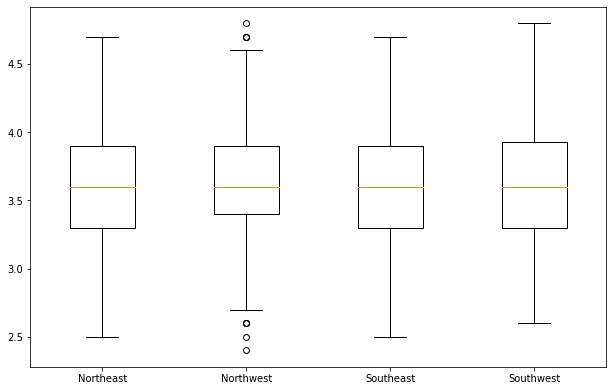

In [ ]:

data = [northeast['Rating'], northwest['Rating'], southeast['Rating'], southwest['Rating']] 
  
fig = plt.figure(figsize =(8, 5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

ax.set_xticklabels(['Northeast', 'Northwest',  
                    'Southeast', 'Southwest'])  
# Creating plot 
bp = ax.boxplot(data) 
  
# show plot 
plt.show() 

Although the averages are quite similar (expected with a large sample size), based on our previous calculations, we find that in order of mean ratings by region, the order goes Northwest, Southwest, Northeast, then Southeast. In terms of variability of ratings, the order goes (from most variability to the least) Southwest, Northeast, Southeast, and Northwest. From the boxplots, it's extremely interesting that although Northwest had the smallest standard deviation, it was the only region with rating outliers.

**Finding #3**

Let's use the regions again, but this time we can look at more subjective aspects of the restaurants. We'll use Average Cost, Minimum Order, Votes, and Cook Time. These values don't put restaurants above each other, however, as although most people may want a faster cooking time, some might be looking for a good dining experience and are willing to wait longer to have a more enjoyable time.

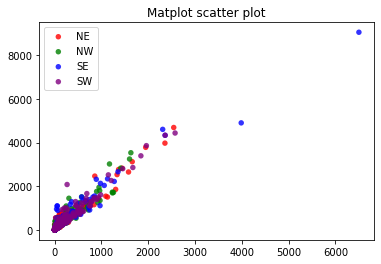

In [ ]:
d1 = (northeast['Reviews'],northeast['Votes'])
d2 = (northwest['Reviews'],northwest['Votes'])
d3 = (southeast['Reviews'],southeast['Votes'])
d4 = (southwest['Reviews'],southwest['Votes'])

data = (d1, d2, d3, d4)
colors = ("red", "green", "blue", "purple")
groups = ("NE", "NW", "SE", "SW")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

In [ ]:
se_new = southeast.loc[southeast['Reviews']!=southeast['Reviews'].max()]
se_new = se_new.loc[se_new['Reviews']!=se_new['Reviews'].max()]

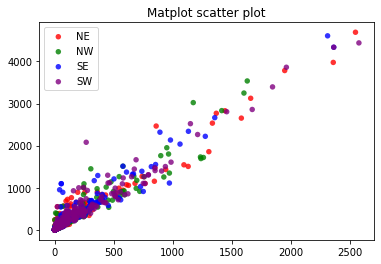

In [ ]:
d1 = (northeast['Reviews'],northeast['Votes'])
d2 = (northwest['Reviews'],northwest['Votes'])
d3 = (se_new['Reviews'],se_new['Votes'])
d4 = (southwest['Reviews'],southwest['Votes'])

data = (d1, d2, d3, d4)
colors = ("red", "green", "blue", "purple")
groups = ("NE", "NW", "SE", "SW")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

**Finding #4**

In [ ]:
#divide up the 4 regions based off the middle (50%)
#of the latitude and longitude values
northeast = data.loc[(data['Latitude']>=39.494870) & (data['Longitude']>=-85.509055)]
northwest = data.loc[(data['Latitude']<39.494870) & (data['Longitude']>=-85.509055)]
southeast = data.loc[(data['Latitude']>=39.494870) & (data['Longitude']<-85.509055)]
southwest = data.loc[(data['Latitude']<39.494870) & (data['Longitude']<-85.509055)]
#perfect, all of them have almost the same amount of restaurants


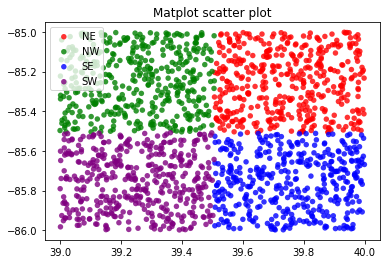

In [ ]:
d1 = (northeast['Latitude'],northeast['Longitude'])
d2 = (northwest['Latitude'],northwest['Longitude'])
d3 = (southeast['Latitude'],southeast['Longitude'])
d4 = (southwest['Latitude'],southwest['Longitude'])

data = (d1, d2, d3, d4)
colors = ("red", "green", "blue", "purple")
groups = ("NE", "NW", "SE", "SW")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

for data, color, group in zip(data, colors, groups):
  x, y = data
  ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


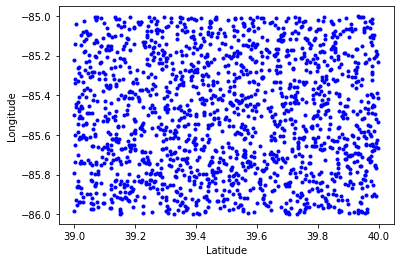

In [ ]:
#Let's subset only the values with ratings
ratings = data.loc[(data['Rating']!='-')&(data['Rating']!='NEW')&(data['Rating']!='Opening Soon')]
ratings['Rating'] = ratings['Rating'].astype(float)


plt.plot(ratings['Latitude'], ratings['Longitude'], 'bo',markersize=3)
# plt.plot(ratings['Latitude'], ratings['Longitude'], 'bo',markersize=ratings['Rating'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
data['Cook_Time'].describe()

count    2019.000000
mean       36.921743
std        11.804352
min        10.000000
25%        30.000000
50%        30.000000
75%        45.000000
max       120.000000
Name: Cook_Time, dtype: float64